<h1>HumanPresenceDetector data analysis</h1>


<h3>1 Load data from file</h3>

In [1]:
# Import needed libraries

import re
import pandas as pd

# DataFrame to contain the sensor data
data = pd.DataFrame()

# Filepath of the data file
filepath = 'data.txt'


with open(filepath) as fp:
    line = fp.readline()
    counter = 0

    while line:
        
        # Regex pattern to recognize needed data
        match = re.findall(pattern=('(\d+.\d+)'), string=line)
        if len(match) == 16:
            dataSeries = pd.Series(match ,dtype='float', name=counter)
            counter += 1
            data = data.append(dataSeries, sort=None)

        line = fp.readline()
print(data.describe())

               0           1           2            3           4   \
count  487.000000  487.000000  487.000000   487.000000  487.000000   
mean    19.980082   20.645175   24.633060    42.482752   20.528953   
std      1.647817    2.163010    4.492668   162.582692    1.664160   
min     19.400000   19.100000   19.400000    19.700000   19.800000   
25%     19.600000   19.400000   19.600000    20.000000   20.100000   
50%     19.700000   19.700000   23.700000    24.300000   20.300000   
75%     19.800000   21.300000   29.700000    28.700000   20.400000   
max     33.200000   33.300000   33.400000  1496.300000   33.100000   

               5           6           7           8           9           10  \
count  487.000000  487.000000  487.000000  487.000000  487.000000  487.000000   
mean    21.045996   23.165708   25.987064   20.214168   21.265708   24.028337   
std      2.328270    4.250001    4.825756    1.647540    2.013901    4.958662   
min     19.900000    2.300000    1.600000   1

<h3>2 Filter data</h3>


From data descriptions we can see that measurements include some erroneous data.

Let's filter out all the row's containing erroneous data.

1. Set values over 40 and below 10 to NA
2. Drop lines with NA values

In [2]:
data = data[data < 40]
data = data[data > 10]
data = data.dropna()

# Drop first 10 rows
# data = data.iloc[10:]

# print(data.describe())

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(data)
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (celsius)")
plt.show()

<Figure size 800x320 with 1 Axes>

<h3>3 Classification data</h3>

From the chart above we can see that human is present when at least one of the values is above 27 celsius.
We can use this information to classify the data.

Add class column to data dataframe and use this classification:

0 No human detected
1 Human is present



In [4]:
# Create classification data
classification = pd.Series()

# Boolean mask for data >= 27
data1mask = data.iloc[::] >= 27

# Iterate through Boolean mask and if row contains value True, add 1 to classification. Else add 0. 
for i in range(len(data1mask)):
    humanDetected = False
    for j in range(16):
        maskValue = data1mask.iloc[i, j]
        if (maskValue == True):
            humanDetected = True

    if (humanDetected == True):
        classification = classification.append(pd.Series([1]), ignore_index=True)
    else:       
        classification = classification.append(pd.Series([0]), ignore_index=True)


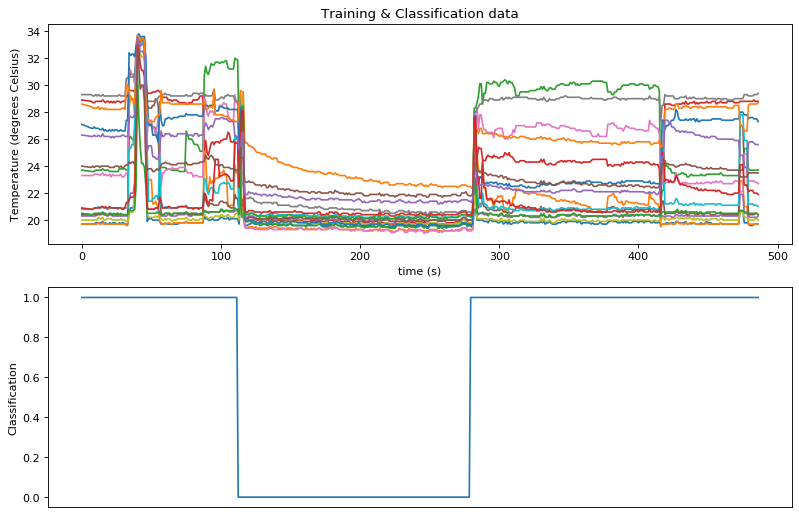

In [5]:
# Visualization of the training & classification data

plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')


plt.subplot(2, 1, 1)
plt.plot(data)
plt.title('Training & Classification data')
plt.xlabel('time (s)')
plt.ylabel('Temperature (degrees Celsius)')

plt.subplot(2, 1, 2)
plt.plot(classification)
plt.xticks([])
plt.ylabel('Classification')

plt.show()

<h3>4 Machine Learning model</h3>


In [6]:
# Create and split the data for classifier

import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(data)
y = np.array(classification)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)


# Fit the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train )

# Print models accuracy score
print("Accuracy score:")
print(clf.score(X_test, y_test))


Accuracy score:
1.0
